In [54]:
# Analyse de données
import chardet
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# Standardisation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from preprocess_utils import is_boolean_like

In [7]:
with open('data/houses_madrid_cleaned.feather', 'rb') as file :
    encodage = chardet.detect(file.read(10000))

print(encodage)

{'encoding': 'Windows-1254', 'confidence': 0.5863758896044059, 'language': 'Turkish'}


In [8]:
pd.options.display.max_columns = None
df = pd.read_feather("data/houses_madrid_cleaned.feather")

In [9]:
df.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,is_floor_under,rent_price,buy_price,buy_price_by_area,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,product,neighborhood
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21742,64,60,2,1,<NA>,<NA>,3,0,471,85000,1328,0,False,1960,<NA>,<NA>,1,0,0,1,0,0,0,0,0,0,0,<NA>,0,<NA>,<NA>,0,1,0,0,piso,135
21741,70,<NA>,3,1,<NA>,<NA>,4,0,666,129900,1856,1,False,<NA>,<NA>,<NA>,0,1,1,1,0,0,1,0,0,0,0,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,piso,132
21740,94,54,2,2,<NA>,<NA>,1,0,722,144247,1535,0,False,<NA>,0,1,0,1,1,1,0,0,0,0,1,0,0,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,piso,134
21739,64,<NA>,2,1,<NA>,<NA>,bajo,1,583,109900,1717,0,False,1955,<NA>,<NA>,0,0,1,1,0,0,0,0,1,1,0,<NA>,0,<NA>,<NA>,0,0,1,0,piso,134
21738,108,90,2,2,<NA>,<NA>,4,0,1094,260000,2407,0,False,2003,<NA>,<NA>,1,1,1,1,0,1,0,0,1,0,1,<NA>,1,1,0,1,1,1,1,piso,133


In [7]:
df.describe(include='all')

,built_year,buy_price,buy_price_by_area,energy,floor,has_ac,has_balcony,has_central_heating,has_fitted_wardrobes,has_green_zones,has_garden,has_individual_heating,has_lift,has_parking,has_pool,has_storage_room,has_terrace,is_accessible,is_exterior,is_floor_under,is_new_development,is_orientation_east,is_orientation_north,is_orientation_south,is_orientation_west,is_parking_included_in_price,is_renewal_needed,n_bathrooms,n_floors,n_rooms,neighborhood,parking_price,rent_price,sq_mt_allotment,sq_mt_built,sq_mt_useful,type
count,9862.000000,2.147200e+04,21472.000000,4310,18876,21472.000000,21472.000000,13398.000000,21472.000000,21472.000000,21472.000000,13398.000000,19104.000000,21472.000000,21472.000000,21472.000000,21472.000000,21472.000000,18451.000000,20309.000000,20494,11198.000000,11198.000000,11198.000000,11198.000000,7646.000000,21472.000000,21456.000000,1433.000000,21472.000000,21472.000000,7646.000000,21472,1430.000000,21346.000000,8146.000000,21472
unique,NaN,NaN,NaN,6,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1671,NaN,NaN,NaN,8
top,NaN,NaN,NaN,d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2514,NaN,NaN,NaN,piso
freq,NaN,NaN,NaN,1108,4360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173,NaN,NaN,NaN,17456
mean,1969.619955,6.561246e+05,4019.055002,NaN,NaN,0.515322,0.152804,0.300791,0.615127,0.186941,0.072327,0.699209,0.769420,0.356092,0.239335,0.355020,0.440620,0.186755,0.905805,0.123935,NaN,0.445615,0.246562,0.512770,0.358725,0.921789,0.184054,2.095544,3.130495,3.008895,62.892325,2664.675124,NaN,242.027972,147.361754,103.496931,NaN
std,30.988121,7.855216e+05,1910.563339,NaN,NaN,0.499777,0.359807,0.458619,0.486577,0.389873,0.259034,0.458619,0.421215,0.478854,0.426687,0.478531,0.496473,0.389724,0.292108,0.329516,NaN,0.497056,0.431029,0.499859,0.479648,0.268521,0.387537,1.411246,0.907987,1.513962,38.289157,13402.229891,NaN,247.495360,134.670364,88.480805,NaN
min,1723.000000,3.600000e+04,447.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,NaN,1.000000,13.000000,1.000000,NaN
25%,1958.000000,1.980000e+05,2547.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,30.000000,0.000000,NaN,2.000000,70.000000,59.000000,NaN
50%,1970.000000,3.750000e+05,3718.000000,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,59.000000,0.000000,NaN,233.000000,100.000000,79.000000,NaN
75%,1994.000000,7.691048e+05,5000.000000,NaN,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,4.000000,4.000000,94.000000,0.000000,NaN,354.000000,163.000000,113.000000,NaN


In [ ]:
df.hist(bins=50, figsize=(20,15))


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Séparation des variables booléennes, numériques, et qualitatives</h3>
</div>

In [43]:
from preprocess_utils import split_columns

df_bool, df_num, df_quali, bool_cols, num_col, quali_cols = split_columns(df, convert_bool=True, bool_dtype='UInt8')

print(f"bool: {bool_cols}\n")
print(f"numeric: {num_cols}\n")
print(f"qualitative: {quali_cols}\n")
print(df_bool.shape, df_num.shape, df_quali.shape)

bool: ['has_ac', 'has_balcony', 'has_central_heating', 'has_fitted_wardrobes', 'has_green_zones', 'has_garden', 'has_individual_heating', 'has_lift', 'has_parking', 'has_pool', 'has_storage_room', 'has_terrace', 'is_accessible', 'is_exterior', 'is_floor_under', 'is_new_development', 'is_orientation_east', 'is_orientation_north', 'is_orientation_south', 'is_orientation_west', 'is_parking_included_in_price', 'is_renewal_needed']

numeric: ['built_year', 'buy_price', 'buy_price_by_area', 'energy', 'floor', 'n_bathrooms', 'n_floors', 'n_rooms', 'neighborhood', 'parking_price', 'rent_price', 'sq_mt_allotment', 'sq_mt_built', 'sq_mt_useful', 'type']

qualitative: ['energy', 'floor', 'rent_price', 'type']

(21472, 22) (21472, 11) (21472, 4)


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Distribution des valeurs des variables numériques</h3>
</div>

array([[<Axes: title={'center': 'built_year'}>,
        <Axes: title={'center': 'buy_price'}>,
        <Axes: title={'center': 'buy_price_by_area'}>],
       [<Axes: title={'center': 'n_bathrooms'}>,
        <Axes: title={'center': 'n_floors'}>,
        <Axes: title={'center': 'n_rooms'}>],
       [<Axes: title={'center': 'neighborhood'}>,
        <Axes: title={'center': 'parking_price'}>,
        <Axes: title={'center': 'sq_mt_allotment'}>],
       [<Axes: title={'center': 'sq_mt_built'}>,
        <Axes: title={'center': 'sq_mt_useful'}>, <Axes: >]], dtype=object)

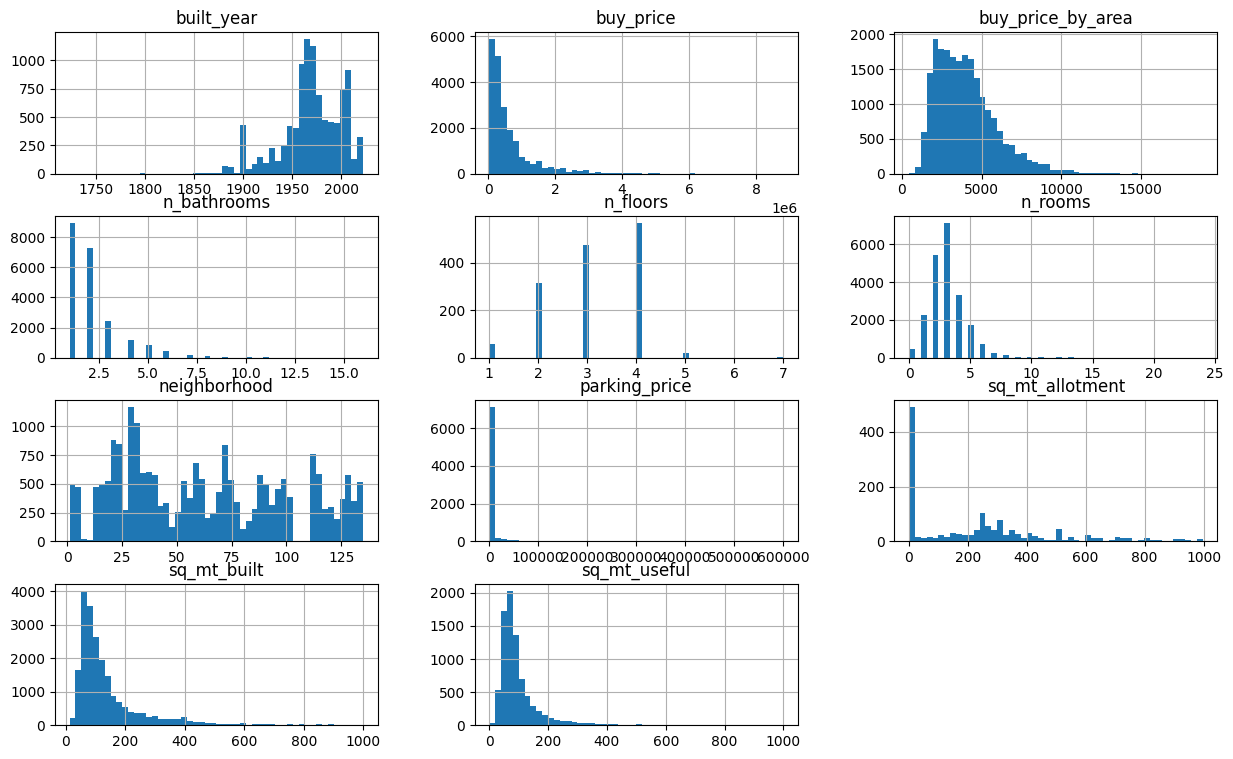

In [47]:
df_num.hist(bins=50, figsize=(15,9))

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Distribution des valeurs des variables qualitatives</h3>
</div>

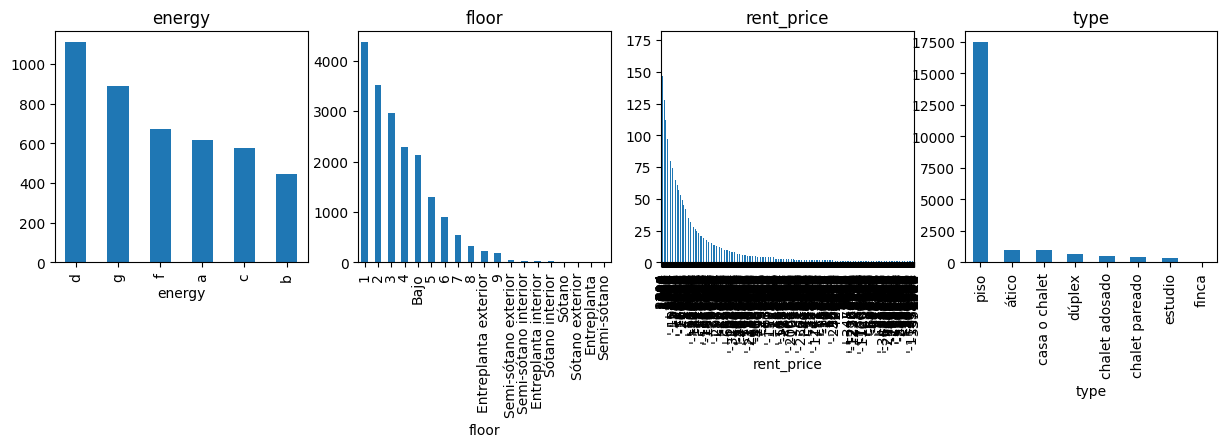

In [46]:
# Visualisation des différentes valeurs des variables catégorielles
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

for ax, col in zip(axes.flatten(), quali_cols):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)

array([[<Axes: xlabel='built_year', ylabel='built_year'>,
        <Axes: xlabel='buy_price', ylabel='built_year'>,
        <Axes: xlabel='buy_price_by_area', ylabel='built_year'>,
        <Axes: xlabel='n_bathrooms', ylabel='built_year'>,
        <Axes: xlabel='n_floors', ylabel='built_year'>,
        <Axes: xlabel='n_rooms', ylabel='built_year'>,
        <Axes: xlabel='neighborhood', ylabel='built_year'>,
        <Axes: xlabel='parking_price', ylabel='built_year'>,
        <Axes: xlabel='sq_mt_allotment', ylabel='built_year'>,
        <Axes: xlabel='sq_mt_built', ylabel='built_year'>,
        <Axes: xlabel='sq_mt_useful', ylabel='built_year'>],
       [<Axes: xlabel='built_year', ylabel='buy_price'>,
        <Axes: xlabel='buy_price', ylabel='buy_price'>,
        <Axes: xlabel='buy_price_by_area', ylabel='buy_price'>,
        <Axes: xlabel='n_bathrooms', ylabel='buy_price'>,
        <Axes: xlabel='n_floors', ylabel='buy_price'>,
        <Axes: xlabel='n_rooms', ylabel='buy_price'>,
  

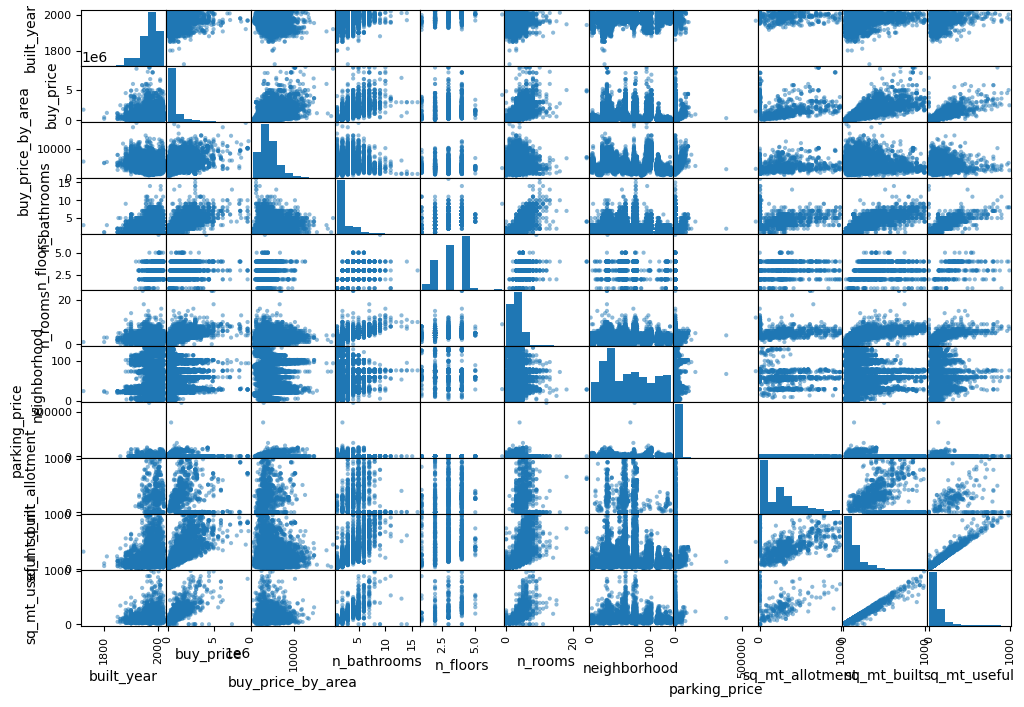

In [52]:
scatter_matrix(df_num, figsize=(12, 8))

In [ ]:
# Réordonne df_num pour mettre buy_price en premier
cols = ['buy_price'] + [c for c in df_num.columns if c != 'buy_price']
df_num = df_num[cols]


Text(0.5, 1.0, 'Matrice de corrélation')

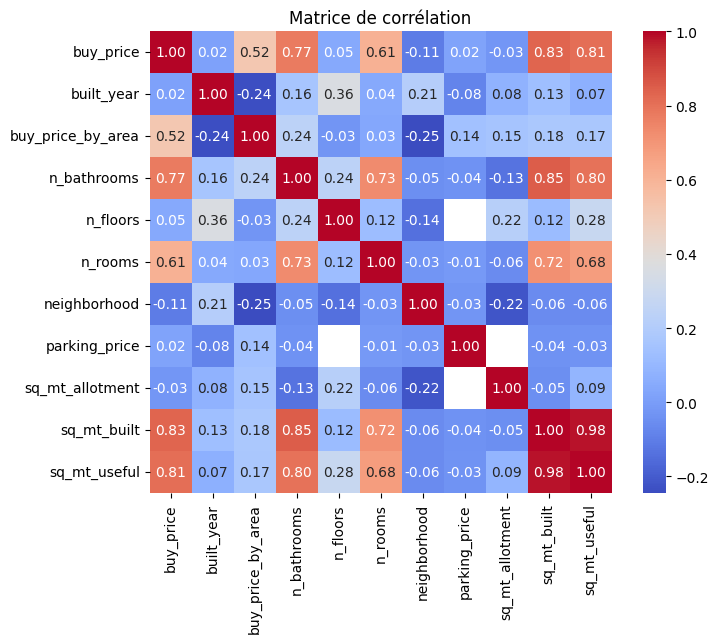

In [57]:
correlation_matrix = df_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, square=True, fmt=".2f")
plt.title("Matrice de corrélation")